## Emulsion index modulation and deltamax fit 

 author : Sylvie Dagoret-Campagne
- aflilation IJCLab/IN2P3/CNRS
- creation date 2025-01-19
- doc on FFT : https://numpy.org/doc/2.0/reference/generated/numpy.fft.fft.html
- conda environnement : poppy_conda_py312 (on my macbook)
- install poppy : https://poppy-optics.readthedocs.io/en/latest/
- install rise in jupyterlab to see the slides : https://github.com/jupyterlab-contrib/rise
- install pandoc for documentation

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import astropy.units as u
from scipy.integrate import quad

In [2]:
from auxtelpsfpoppy import libholotransmission as lib

In [3]:
import matplotlib as mpl

mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.linestyle'] = '-'
mpl.rcParams['axes.titlesize'] =  24
mpl.rcParams['axes.labelsize'] =  20
mpl.rcParams['lines.markersize'] =  10
mpl.rcParams['xtick.labelsize'] =  16
mpl.rcParams['ytick.labelsize'] = 16

In [4]:
TOP_DATA_PATH = lib.get_data_path()
DELTAMAX_DATA_PATH = os.path.join(TOP_DATA_PATH,"PlotDigitizer/deltamaxvswl")
DELTAMAX_FILENAME1 = "plot-data_indexmodvswl.csv"
DELTAMAX_FULLFILENAME1 = os.path.join(DELTAMAX_DATA_PATH,DELTAMAX_FILENAME1)
DELTAMAX_FILENAME2 = "plot-data_deltamaxvswl.csv"
DELTAMAX_FULLFILENAME2 = os.path.join(DELTAMAX_DATA_PATH,DELTAMAX_FILENAME2)

## Index modulation

In [5]:
df = pd.read_csv(DELTAMAX_FULLFILENAME1)

In [6]:
cols = df.columns
print(cols)
for col in cols:
    df[col] = df[col].astype(float)

Index(['x', ' y'], dtype='object')


In [7]:
df.head()

,x,y
0,357.845579,0.152636
1,365.691158,0.149014
2,373.536737,0.146117
3,382.254047,0.142978
4,389.227895,0.140322


In [8]:
df = df.rename(columns={1: "wl", 2: "deltamax"})

In [9]:
df["x"] = df["x"].astype(float)

In [10]:
X = df["x"].values
Xinv = 1./X

In [25]:
Y = np.array(df[" y"])

<>:5: SyntaxWarning: invalid escape sequence '\,'
<>:5: SyntaxWarning: invalid escape sequence '\,'
/var/folders/79/hrybm_4s0zjd4jsb7lp_trhh0000gp/T/ipykernel_15206/2550012924.py:5: SyntaxWarning: invalid escape sequence '\,'
  ax.set_title("$index-mod \, vs  \, \\lambda$ ")


Text(0.5, 1.0, '$index-mod \\, vs  \\, \\lambda$ ')

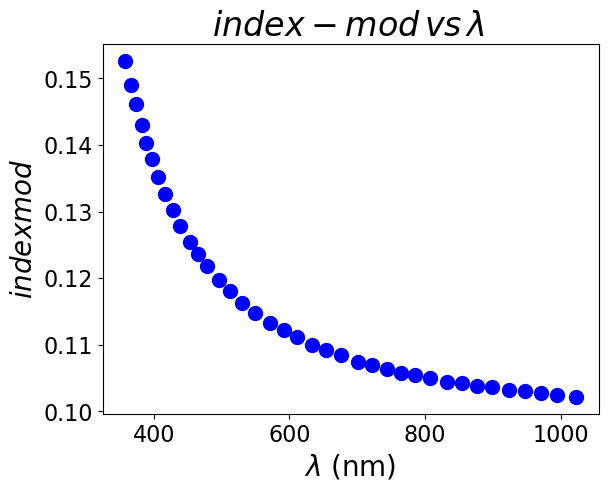

In [12]:
fig,ax = plt.subplots(1,1)
ax.scatter(X,Y,c='b')
ax.set_xlabel("$\\lambda$ (nm)")
ax.set_ylabel("$index mod$ ")
ax.set_title("$index-mod \, vs  \, \\lambda$ ")

<>:5: SyntaxWarning: invalid escape sequence '\,'
<>:5: SyntaxWarning: invalid escape sequence '\,'
/var/folders/79/hrybm_4s0zjd4jsb7lp_trhh0000gp/T/ipykernel_15206/345062722.py:5: SyntaxWarning: invalid escape sequence '\,'
  ax.set_title("$index-mod \, vs  \, 1/\\lambda$ ")


Text(0.5, 1.0, '$index-mod \\, vs  \\, 1/\\lambda$ ')

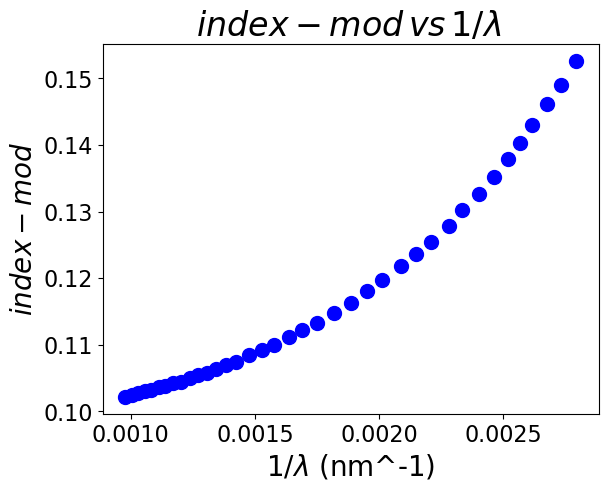

In [13]:
fig,ax = plt.subplots(1,1)
ax.scatter(Xinv,Y,c="b")
ax.set_xlabel("$1/\\lambda$ (nm^-1)")
ax.set_ylabel("$index-mod$ ")
ax.set_title("$index-mod \, vs  \, 1/\\lambda$ ")

In [14]:
Z = np.polyfit(Xinv, Y, deg=4)

In [15]:
p = np.poly1d(Z)

In [16]:
xfit = np.linspace(Xinv.min(),Xinv.max(),100)
yfit = p(xfit)
yfit_v2 = Z[4] + Z[3]*xfit+ Z[2]*xfit**2 + Z[1]*xfit**3 + Z[0] *xfit**4

<>:7: SyntaxWarning: invalid escape sequence '\,'
<>:7: SyntaxWarning: invalid escape sequence '\,'
/var/folders/79/hrybm_4s0zjd4jsb7lp_trhh0000gp/T/ipykernel_15206/53662337.py:7: SyntaxWarning: invalid escape sequence '\,'
  ax.set_title("$index-mod \, vs  \, 1/\\lambda$ ")


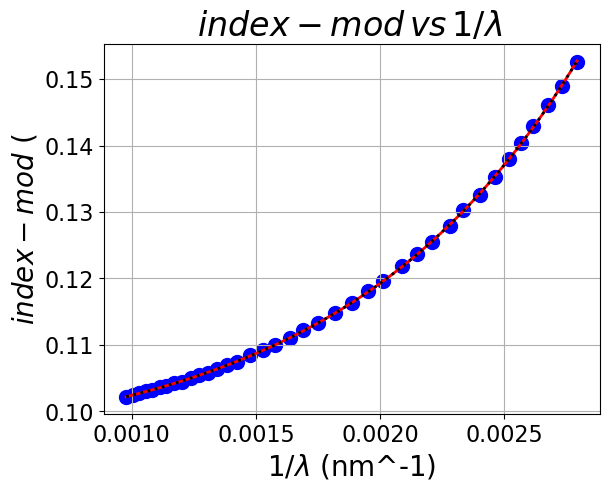

In [17]:
fig,ax = plt.subplots(1,1)
ax.scatter(Xinv,Y,c="b")
ax.plot(xfit,yfit,"-r")
ax.plot(xfit,yfit_v2,":k")
ax.set_xlabel("$1/\\lambda$ (nm^-1)")
ax.set_ylabel("$index-mod$ (")
ax.set_title("$index-mod \, vs  \, 1/\\lambda$ ")
ax.grid()

In [18]:
Z

array([ 1.11813105e+09, -3.80887867e+06,  1.02558810e+04, -4.05052174e+00,
        9.89018007e-02])

## Delta max

In [19]:
df = pd.read_csv(DELTAMAX_FULLFILENAME2)

In [21]:
cols = df.columns
print(cols)
for col in cols:
    df[col] = df[col].astype(float)

Index(['x', ' y'], dtype='object')


In [22]:
X = df["x"].values
Xinv = 1./X

In [24]:
Y = np.array(df[" y"])

<>:5: SyntaxWarning: invalid escape sequence '\,'
<>:5: SyntaxWarning: invalid escape sequence '\,'
/var/folders/79/hrybm_4s0zjd4jsb7lp_trhh0000gp/T/ipykernel_15206/1728208785.py:5: SyntaxWarning: invalid escape sequence '\,'
  ax.set_title("$\\Delta_{max} \, vs  \, \\lambda$ ")


Text(0.5, 1.0, '$\\Delta_{max} \\, vs  \\, \\lambda$ ')

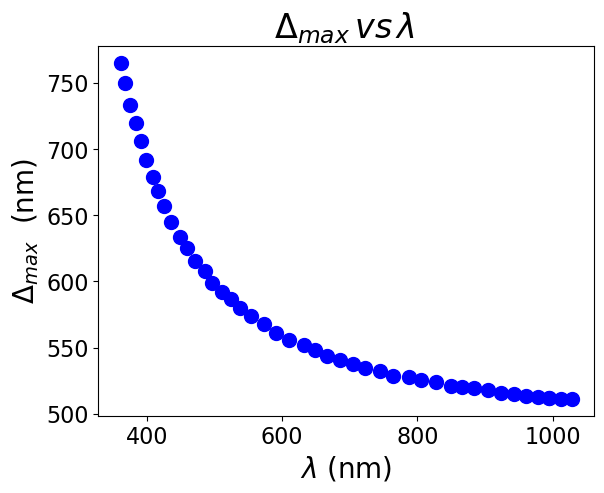

In [27]:
fig,ax = plt.subplots(1,1)
ax.scatter(X,Y,c='b')
ax.set_xlabel("$\\lambda$ (nm)")
ax.set_ylabel("$\\Delta_{max}$  (nm)")
ax.set_title("$\\Delta_{max} \, vs  \, \\lambda$ ")

In [28]:
Z = np.polyfit(Xinv, Y, deg=4)

In [29]:
p = np.poly1d(Z)

In [30]:
xfit = np.linspace(Xinv.min(),Xinv.max(),100)
yfit = p(xfit)
yfit_v2 = Z[4] + Z[3]*xfit+ Z[2]*xfit**2 + Z[1]*xfit**3 + Z[0] *xfit**4

<>:7: SyntaxWarning: invalid escape sequence '\,'
<>:7: SyntaxWarning: invalid escape sequence '\,'
/var/folders/79/hrybm_4s0zjd4jsb7lp_trhh0000gp/T/ipykernel_15206/41516921.py:7: SyntaxWarning: invalid escape sequence '\,'
  ax.set_title("$\\Delta_{max} \, vs  \, 1/\\lambda$ ")


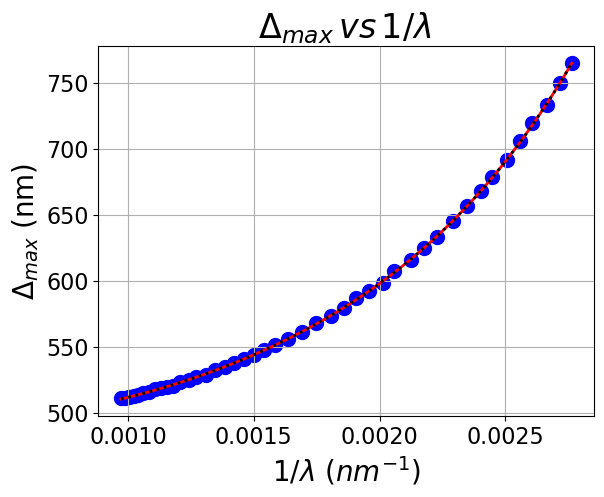

In [31]:
fig,ax = plt.subplots(1,1)
ax.scatter(Xinv,Y,c="b")
ax.plot(xfit,yfit,"-r")
ax.plot(xfit,yfit_v2,":k")
ax.set_xlabel("$1/\\lambda$ ($nm^{-1}$)")
ax.set_ylabel("$\\Delta_{max}$ (nm)")
ax.set_title("$\\Delta_{max} \, vs  \, 1/\\lambda$ ")
ax.grid()

In [32]:
Z

array([ 9.50123454e+12, -4.39834684e+10,  1.10751635e+08, -8.05697911e+04,
        5.16109943e+02])